In [33]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Load data

customer_df = pd.read_csv('marketing_customer_analysis_cleaned.csv')

In [35]:
# Drop Unnamed: 0 column

customer_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [36]:
# 1. Get the numerical variables from our dataset.

numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,response,coverage,employment_status,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,vehicle_size
0,2763.519279,0,0,0,56274,69,32,5,0,1,384.811147,0
1,6979.535903,0,1,1,0,94,13,42,0,8,1131.464935,0
2,12887.431650,0,2,0,48767,108,18,38,0,2,566.472247,0
3,7645.861827,0,0,1,0,106,18,65,0,7,529.881344,0
4,2813.692575,0,0,0,43836,73,12,44,0,1,138.130879,0


In [37]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [38]:
# Split continuous and discrete dataframes

def split_continuous_discrete(dataframe):
    continuous_variables = []
    discrete_variables = []
    for col_name in dataframe.columns:
        if dataframe[col_name].dtype in [float, np.datetime64] or (dataframe[col_name].nunique() * 100) / dataframe.shape[0] > 2:
            continuous_variables.append(col_name)
        else:
            discrete_variables.append(col_name)
    
    return dataframe[continuous_variables], dataframe[discrete_variables]

continuous_df, discrete_df = split_continuous_discrete(numericals)

<Figure size 640x480 with 0 Axes>

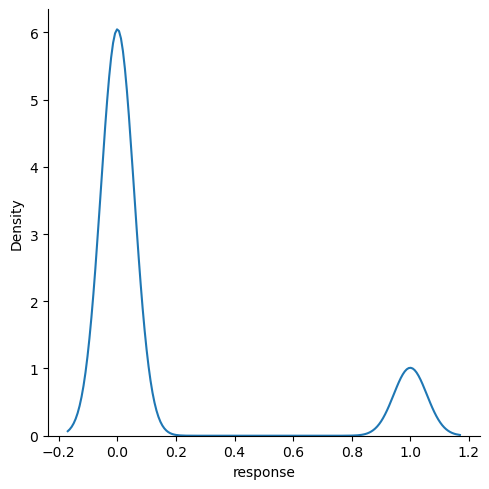

<Figure size 640x480 with 0 Axes>

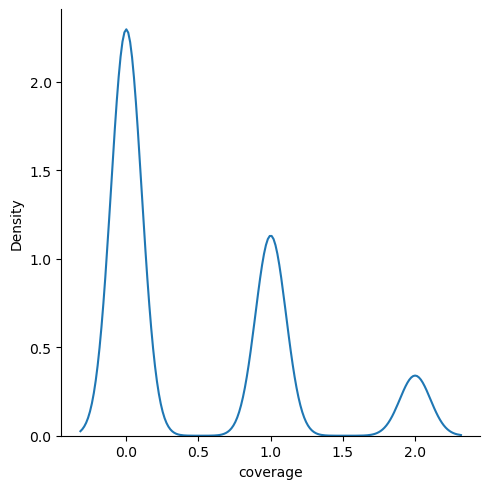

<Figure size 640x480 with 0 Axes>

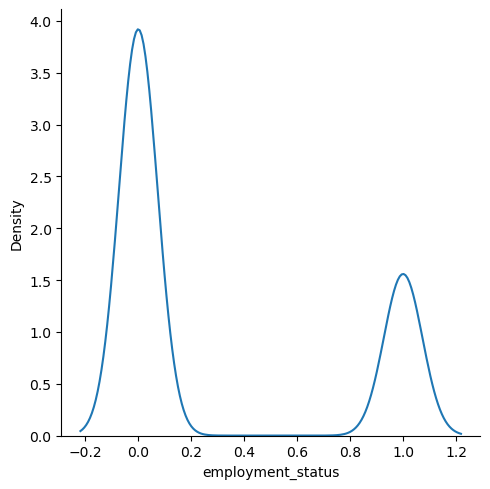

<Figure size 640x480 with 0 Axes>

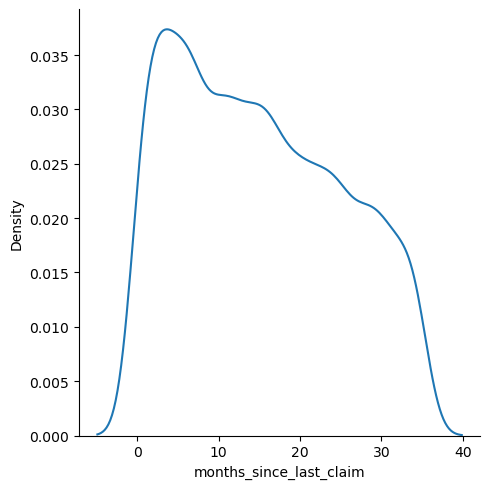

<Figure size 640x480 with 0 Axes>

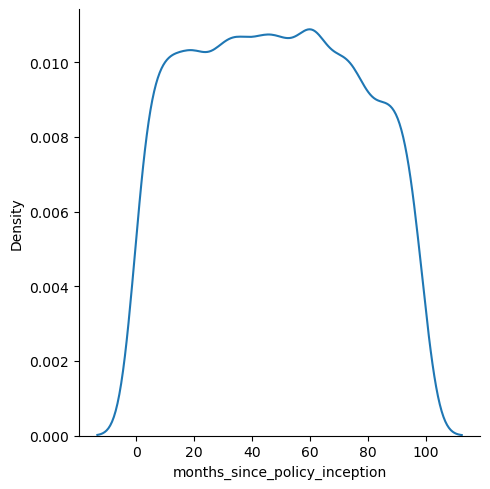

<Figure size 640x480 with 0 Axes>

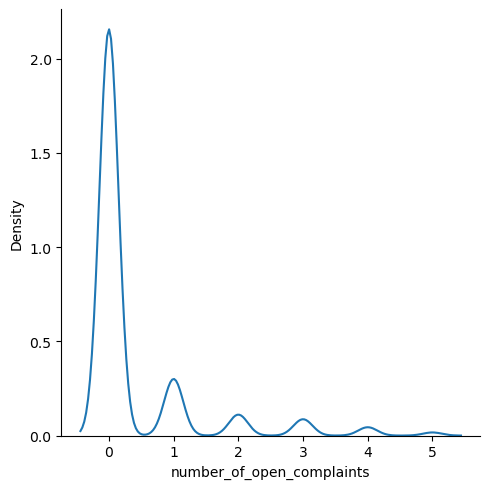

<Figure size 640x480 with 0 Axes>

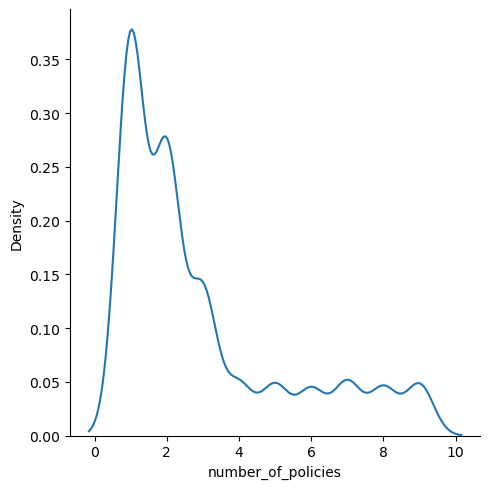

<Figure size 640x480 with 0 Axes>

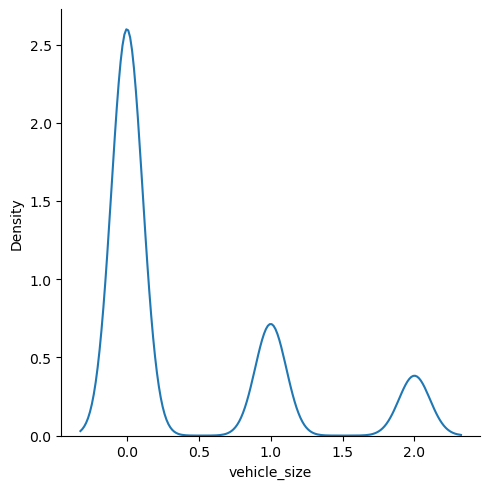

In [39]:
for col_name in discrete_df.columns:
    plt.figure(col_name)
    sns.displot(discrete_df[col_name], kind="kde")

In [40]:
# Except for months_since_policy_inception, which looks like a normal distribution, all discrete variables seems to fit an exponential distribution.

<Figure size 640x480 with 0 Axes>

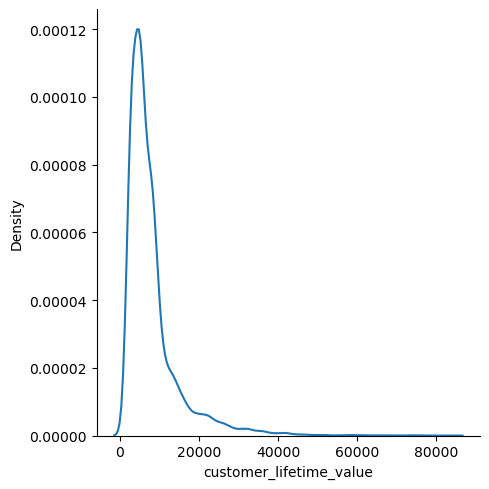

<Figure size 640x480 with 0 Axes>

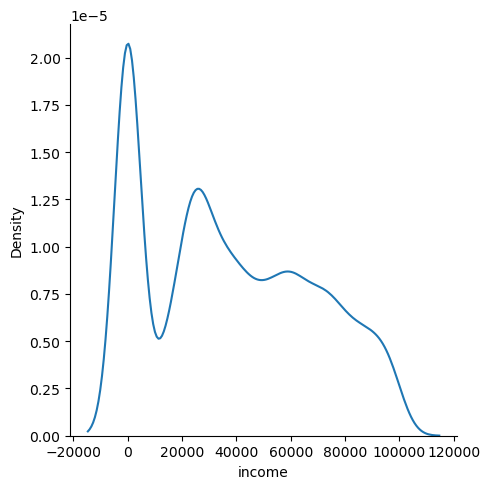

<Figure size 640x480 with 0 Axes>

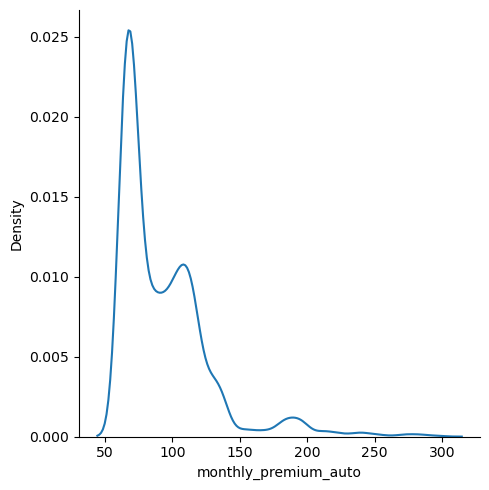

<Figure size 640x480 with 0 Axes>

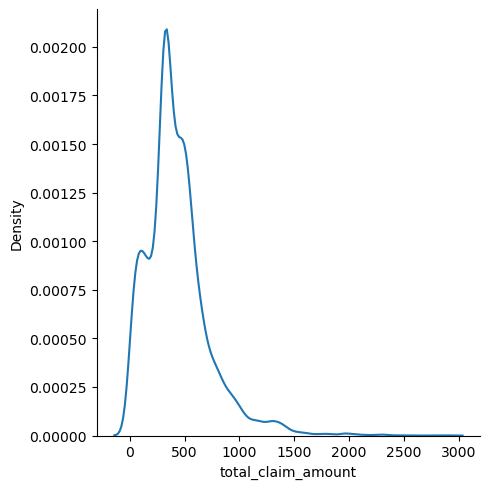

In [41]:
for col_name in continuous_df.columns:
    plt.figure(col_name)
    sns.displot(continuous_df[col_name], kind="kde")

In [42]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [43]:
for col_name in continuous_df.columns:
    continuous_df[col_name] = continuous_df[col_name].apply(np.log)

/var/folders/x6/07vbnp4935lcxx8dmdvxd3700000gn/T/ipykernel_59829/3725322599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continuous_df[col_name] = continuous_df[col_name].apply(np.log)


<Figure size 640x480 with 0 Axes>

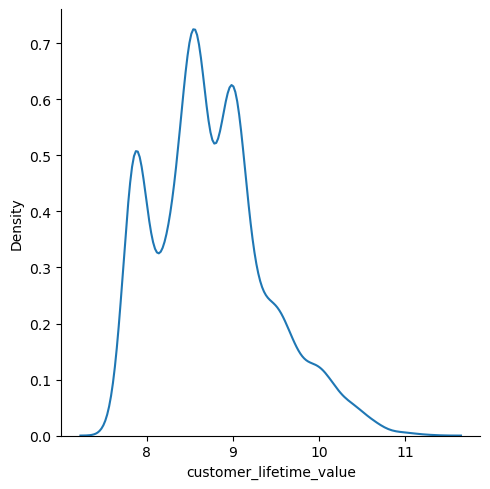

<Figure size 640x480 with 0 Axes>

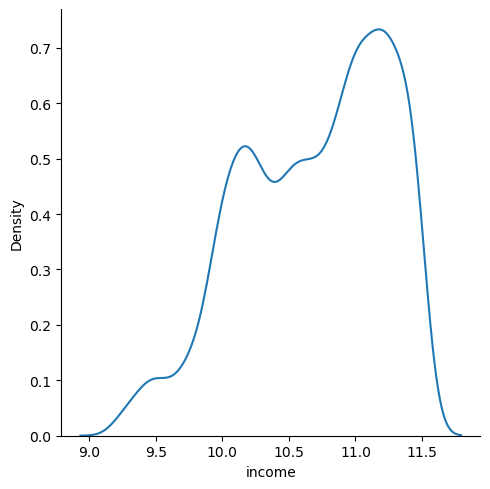

<Figure size 640x480 with 0 Axes>

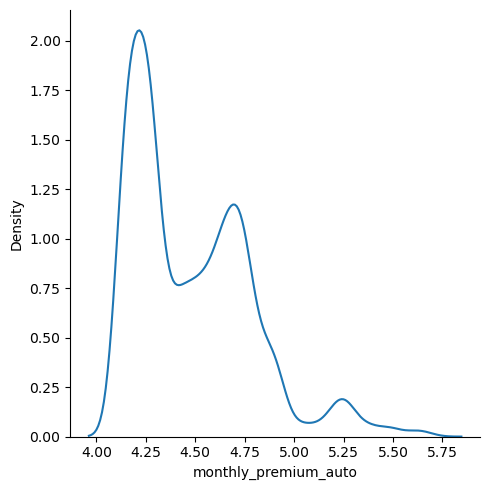

<Figure size 640x480 with 0 Axes>

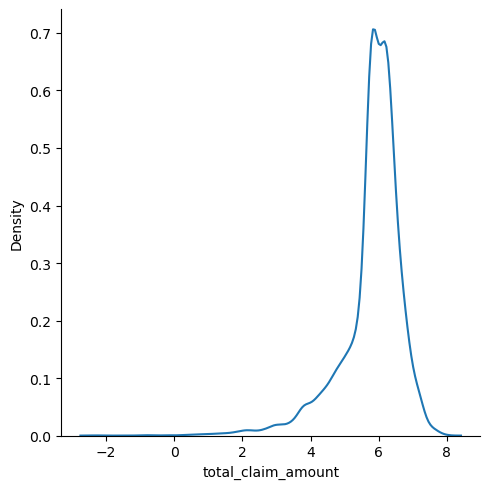

In [44]:
for col_name in continuous_df.columns:
    plt.figure(col_name)
    sns.displot(continuous_df[col_name], kind="kde")

In [ ]:
# After a natural log transformation, continuous variables look more like a normal distribution.